In [1]:
import numpy as np
import pandas as pd
from debugpy.launcher import channel
from scipy.signal import firwin, lfilter
from scipy import ndimage
import matplotlib.pyplot as plt
import seaborn as sns
import os
#os.chdir('/Users/admin/PycharmProjects/ET_eksploracja/hyperscanning-signal-analysis')
%matplotlib inline

In [2]:
import sys
sys.path.append('../src')
import dataloader
from data_structures import MultiModalDataPd

In [3]:
!pwd

/Users/admin/Library/CloudStorage/GoogleDrive-j.zygierewicz@uw.edu.pl/Mój dysk/SYNCIN_JZ/HYPERSCANNING_SIGNAL_ANALYSIS/hyperscanning-signal-analysis/scripts


In [4]:
mmd = MultiModalDataPd("W003")
mmd.add_data(eeg_path = "../data/W003/eeg/")

Detected events: [{'name': 'Brave', 'start': 382.15625, 'duration': 59.3291015625}, {'name': 'Peppa', 'start': 312.259765625, 'duration': 59.61328125}, {'name': 'Incredibles', 'start': 242.8115234375, 'duration': 59.21484375}, {'name': 'Talk_1'}, {'name': 'Talk_2'}]
Applying filters to EEG data. Using fir filtering method.
Based on EEG, setting fs to: 1024


In [5]:
mmd.data.head()

,time,time_idx,events,EEG_ch_Fp1,EEG_ch_Fp2,EEG_ch_F7,EEG_ch_F3,EEG_ch_Fz,EEG_ch_F4,EEG_ch_F8,...,EEG_cg_T5,EEG_cg_P3,EEG_cg_Pz,EEG_cg_P4,EEG_cg_T6,EEG_cg_O1,EEG_cg_O2,ECG_cg,ECG_ch,DIODE
0,-242.811523,-248639.0,None,-142.960800,32.025761,121.871536,368.454590,225.140625,32.846825,-328.390350,...,-373.373047,8180.386719,4390.028809,5513.722656,21834.457031,10223.928711,7228.078125,41.951929,337.290129,0.0
1,-242.810547,-248638.0,None,-545.077148,116.543495,445.072144,1371.940063,840.943176,111.330254,-1248.815796,...,-342.771118,8211.990234,4418.056641,5543.395020,21866.060547,10253.887695,7260.682129,34.660629,464.448826,0.0
2,-242.809570,-248637.0,None,-935.290649,198.744431,758.968201,2346.172363,1438.832397,187.673172,-2142.207520,...,-325.896973,8233.511719,4438.577148,5562.128418,21883.361328,10273.835938,7283.562500,28.814322,587.798645,0.0
3,-242.808594,-248636.0,None,-1304.859009,276.885193,1056.682007,3269.600586,2005.614624,260.262268,-2988.655273,...,-355.140503,8199.262695,4406.402344,5527.164551,21852.974609,10242.875977,7246.096191,31.908562,704.696765,0.0
4,-242.807617,-248635.0,None,-1645.808838,349.367645,1331.930542,4122.547852,2529.241943,327.617035,-3769.992432,...,-402.366211,8147.961914,4356.316406,5477.937500,21804.390625,10194.148438,7196.010742,33.245200,812.729584,0.0


In [6]:
mmd.data.events.unique()

array([None, 'Incredibles', 'Peppa', 'Brave'], dtype=object)

In [7]:
mmd.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523328 entries, 0 to 523327
Data columns (total 48 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        523328 non-null  float64
 1   time_idx    523328 non-null  float64
 2   events      182436 non-null  object 
 3   EEG_ch_Fp1  523328 non-null  float32
 4   EEG_ch_Fp2  523328 non-null  float32
 5   EEG_ch_F7   523328 non-null  float32
 6   EEG_ch_F3   523328 non-null  float32
 7   EEG_ch_Fz   523328 non-null  float32
 8   EEG_ch_F4   523328 non-null  float32
 9   EEG_ch_F8   523328 non-null  float32
 10  EEG_ch_M1   523328 non-null  float32
 11  EEG_ch_T3   523328 non-null  float32
 12  EEG_ch_C3   523328 non-null  float32
 13  EEG_ch_Cz   523328 non-null  float32
 14  EEG_ch_C4   523328 non-null  float32
 15  EEG_ch_T4   523328 non-null  float32
 16  EEG_ch_M2   523328 non-null  float32
 17  EEG_ch_T5   523328 non-null  float32
 18  EEG_ch_P3   523328 non-null  float32
 19  EE

## Test plot of diode signal colored by events

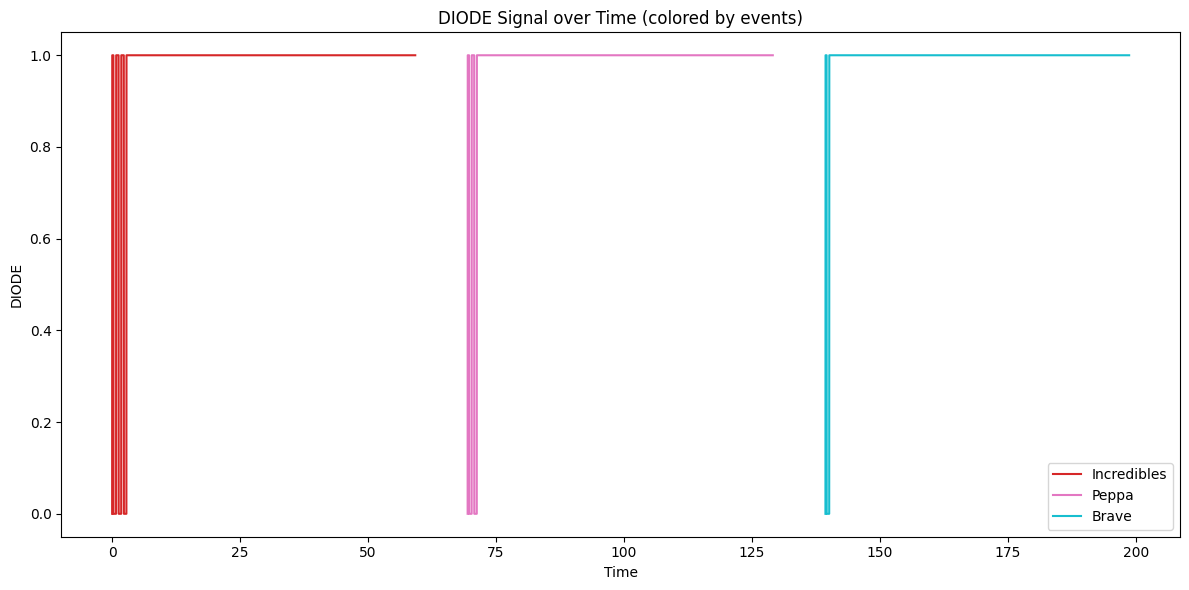

In [8]:
# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique events for color mapping
events = mmd.data['events'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(events)))
event_colors = dict(zip(events, colors))

# Plot DIODE values colored by events
for event in events:
    event_data = mmd.data[mmd.data['events'] == event]
    ax.plot(event_data['time'], event_data['DIODE'], label=event, color=event_colors[event])

ax.set_xlabel('Time')
ax.set_ylabel('DIODE')
ax.set_title('DIODE Signal over Time (colored by events)')
ax.legend()
plt.tight_layout()
plt.show()

In [9]:
mmd.add_data(et_path = "../data/et_data/")
#mmd.add_data(ecg_path = "../data/W003/ecg/")

min 347.531023743903
max 1056.456152707318


In [10]:
mmd.data.head()

,time_idx,events,EEG_ch_Fp1,EEG_ch_Fp2,EEG_ch_F7,EEG_ch_F3,EEG_ch_Fz,EEG_ch_F4,EEG_ch_F8,EEG_ch_M1,...,ET_ch_x,ET_ch_y,ET_cg_x,ET_cg_y,ET_ch_diameter3d,ET_cg_diameter3d,ET_cg_blinks,ET_ch_blinks,ET_event,time
0,-248639.0,None,-142.9608,32.025761,121.871536,368.45459,225.140625,32.846825,-328.39035,-73.5811,...,None,None,None,None,None,None,None,None,None,-242.811523
1,-248638.0,None,-545.077148,116.543495,445.072144,1371.940063,840.943176,111.330254,-1248.815796,-259.428986,...,None,None,None,None,None,None,None,None,None,-242.810547
2,-248637.0,None,-935.290649,198.744431,758.968201,2346.172363,1438.832397,187.673172,-2142.20752,-439.807739,...,None,None,None,None,None,None,None,None,None,-242.809570
3,-248636.0,None,-1304.859009,276.885193,1056.682007,3269.600586,2005.614624,260.262268,-2988.655273,-610.688904,...,None,None,None,None,None,None,None,None,None,-242.808594
4,-248635.0,None,-1645.808838,349.367645,1331.930542,4122.547852,2529.241943,327.617035,-3769.992432,-768.396362,...,None,None,None,None,None,None,None,None,None,-242.807617


In [11]:
mmd.data.loc[mmd.data['ET_event'] == 'm2','ET_cg_x']

319915    0.656004
319916    0.656047
319917     0.65609
319918    0.656133
319919    0.656176
            ...   
381212    0.787978
381213    0.787886
381214    0.787794
381215    0.787702
381216    0.787713
Name: ET_cg_x, Length: 61302, dtype: object

In [12]:
mmd.data.columns

Index(['time_idx', 'events', 'EEG_ch_Fp1', 'EEG_ch_Fp2', 'EEG_ch_F7',
       'EEG_ch_F3', 'EEG_ch_Fz', 'EEG_ch_F4', 'EEG_ch_F8', 'EEG_ch_M1',
       'EEG_ch_T3', 'EEG_ch_C3', 'EEG_ch_Cz', 'EEG_ch_C4', 'EEG_ch_T4',
       'EEG_ch_M2', 'EEG_ch_T5', 'EEG_ch_P3', 'EEG_ch_Pz', 'EEG_ch_P4',
       'EEG_ch_T6', 'EEG_ch_O1', 'EEG_ch_O2', 'EEG_cg_Fp1', 'EEG_cg_Fp2',
       'EEG_cg_F7', 'EEG_cg_F3', 'EEG_cg_Fz', 'EEG_cg_F4', 'EEG_cg_F8',
       'EEG_cg_M1', 'EEG_cg_T3', 'EEG_cg_C3', 'EEG_cg_Cz', 'EEG_cg_C4',
       'EEG_cg_T4', 'EEG_cg_M2', 'EEG_cg_T5', 'EEG_cg_P3', 'EEG_cg_Pz',
       'EEG_cg_P4', 'EEG_cg_T6', 'EEG_cg_O1', 'EEG_cg_O2', 'ECG_cg', 'ECG_ch',
       'DIODE', 'ET_ch_x', 'ET_ch_y', 'ET_cg_x', 'ET_cg_y', 'ET_ch_diameter3d',
       'ET_cg_diameter3d', 'ET_cg_blinks', 'ET_ch_blinks', 'ET_event', 'time'],
      dtype='object')

In [13]:
mmd.data['events'].unique()

array([None, 'Incredibles', 'Peppa', 'Brave'], dtype=object)

In [14]:
mmd.data['ET_event'].unique()

array([None, 'm1', 'm2', 'm3', 'talk1', 'talk2'], dtype=object)

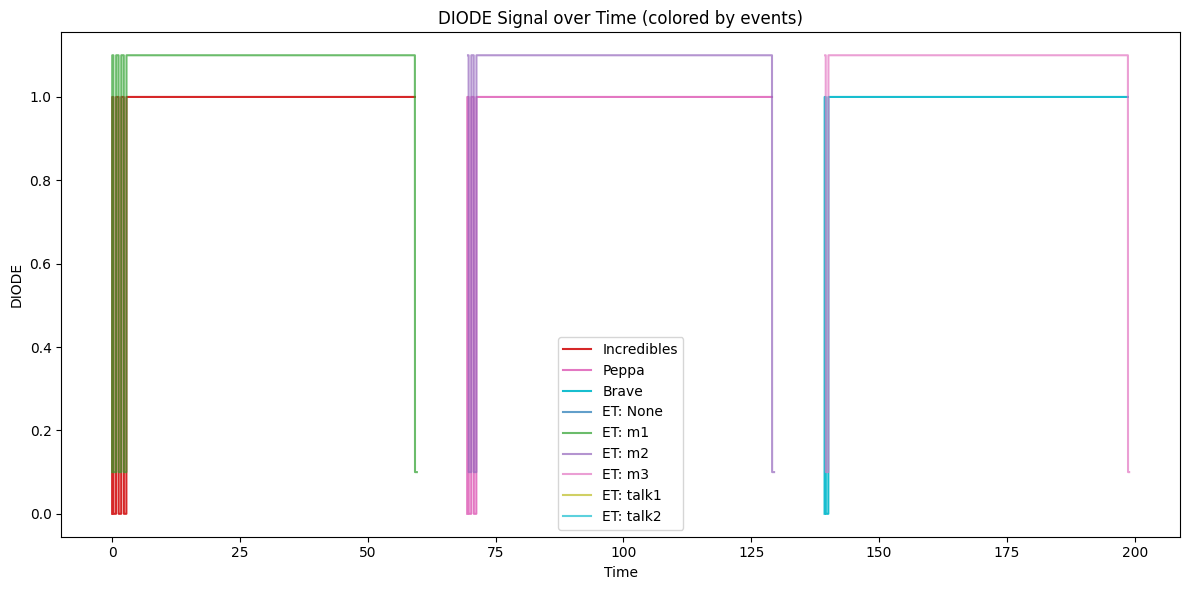

In [15]:
# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique events for color mapping
events = mmd.data['events'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(events)))
event_colors = dict(zip(events, colors))

# Plot DIODE values colored by events
for event in events:
    event_data = mmd.data[mmd.data['events'] == event]
    ax.plot(event_data['time'], event_data['DIODE'], label=event, color=event_colors[event])


# add plots of DIODE vs time_idx colored based on ET_events
et_events = mmd.data['ET_event'].unique()
et_colors = plt.cm.tab10(np.linspace(0, 1, len(et_events)))
et_event_colors = dict(zip(et_events, et_colors))

for et_event in et_events:
    et_event_data = mmd.data[mmd.data['ET_event'] == et_event]
    ax.plot(et_event_data['time'], et_event_data['DIODE']+0.1, label=f'ET: {et_event}', color=et_event_colors[et_event], linestyle='-', alpha=0.7)

ax.set_xlabel('Time')
ax.set_ylabel('DIODE')
ax.set_title('DIODE Signal over Time (colored by events)')
ax.legend()
plt.tight_layout()
#plt.xlim(120, 180)
plt.show()

## Exaple of selecting EEG Fz, ECG and ET y and blinks  data form 'Pepa' event

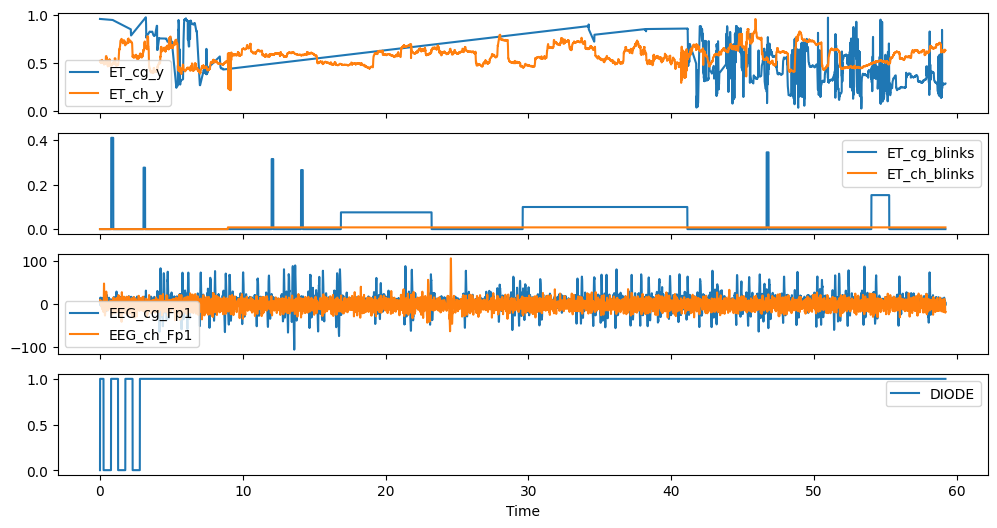

In [16]:
%matplotlib inline
data_selected = mmd.data[(mmd.data.events == 'Incredibles')]
fig, ax = plt.subplots(figsize=(12, 6),sharex=True, sharey=False,nrows=4)
ax[0].plot(data_selected['time'], data_selected['ET_cg_y'], linestyle='-', label='ET_cg_y')
ax[0].plot(data_selected['time'], data_selected['ET_ch_y'], linestyle='-', label='ET_ch_y')
ax[0].legend()

ax[1].plot(data_selected['time'], data_selected['ET_cg_blinks'], linestyle='-', label='ET_cg_blinks')
ax[1].plot(data_selected['time'], data_selected['ET_ch_blinks'], linestyle='-', label='ET_ch_blinks')
ax[1].legend()

ax[2].plot(data_selected['time'], data_selected['EEG_cg_Fp1'], linestyle='-', label='EEG_cg_Fp1')
ax[2].plot(data_selected['time'], data_selected['EEG_ch_Fp1'], linestyle='-', label='EEG_ch_Fp1')
ax[2].legend()

ax[3].plot(data_selected['time'], data_selected['DIODE'], linestyle='-', label='DIODE')
ax[3].legend()
#plt.xlim(0,20)
plt.xlabel('Time')
plt.show()